<a href="https://colab.research.google.com/github/CompSciMScProject/image-spam-email-detector/blob/main/MyMScProjModel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Libraries and Datasets

In [113]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('//content/drive')

Drive already mounted at //content/drive; to attempt to forcibly remount, call drive.mount("//content/drive", force_remount=True).


###Load Sample Image to test dataset access by model

(465, 310, 3)

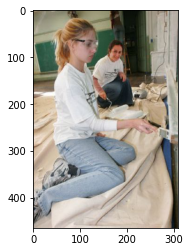

In [ ]:
img = image.load_img('/content/drive/MyDrive/Spam_Image_Detection/BaseData/Training/Ham/006001c607e4$debc0600$9102a8c0@Levi3_image001.jpg')
plt.imshow(img)
cv2.imread('/content/drive/MyDrive/Spam_Image_Detection/BaseData/Training/Ham/006001c607e4$debc0600$9102a8c0@Levi3_image001.jpg').shape

###Generate Training and Validation Dataset

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

### Converting Training Datasets to fit into Neural Network

In [104]:
train_dataset = train.flow_from_directory(directory='/content/drive/MyDrive/Spam_Image_Detection/BaseData/Training/', target_size=(200, 200), batch_size= 10, class_mode= 'binary')

validation_dataset = validation.flow_from_directory(directory='/content/drive/MyDrive/Spam_Image_Detection/BaseData/Validation/', target_size=(200, 200), batch_size = 10, class_mode= 'binary')

Found 2540 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [105]:
train_dataset.class_indices

{'Ham': 0, 'Spam': 1}

In [106]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

### Model Definition

In [107]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(200, 200, 3)),
                                                           tf.keras.layers.MaxPool2D(2,2),
                                                           #
                                                           tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                                           tf.keras.layers.MaxPool2D(2,2),
                                                           #
                                                           tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                                           tf.keras.layers.MaxPool2D(2,2),
                                                           ##
                                                           tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                                           tf.keras.layers.MaxPooling2D(2,2),
                                                           ##
                                                           tf.keras.layers.Flatten(),    
                                                           ##
                                                           tf.keras.layers.Dense(512, activation='relu'),
                                                           ##
                                                           tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])       

###Compile Model

In [109]:
model.compile(loss= 'binary_crossentropy', optimizer = RMSprop(lr=0.001), metrics=['accuracy'])

### Fit Model

In [110]:
model_fit = model.fit(train_dataset, 
                      steps_per_epoch = 2,
                      epochs= 30,
                      validation_data= validation_dataset)

Epoch 1/30
2/2 [==============================] - 2s 947ms/step - loss: 3.8283 - accuracy: 0.6000 - val_loss: 2.2391 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 1s 914ms/step - loss: 0.8848 - accuracy: 0.5333 - val_loss: 0.5443 - val_accuracy: 1.0000
Epoch 3/30
2/2 [==============================] - 1s 884ms/step - loss: 0.8436 - accuracy: 0.2000 - val_loss: 0.8370 - val_accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 2s 779ms/step - loss: 0.6434 - accuracy: 0.6000 - val_loss: 0.9466 - val_accuracy: 0.0000e+00
Epoch 5/30
2/2 [==============================] - 1s 757ms/step - loss: 0.6833 - accuracy: 0.5000 - val_loss: 0.5596 - val_accuracy: 1.0000
Epoch 6/30
2/2 [==============================] - 1s 802ms/step - loss: 0.7507 - accuracy: 0.3333 - val_loss: 0.6901 - val_accuracy: 0.6500
Epoch 7/30
2/2 [==============================] - 1s 750ms/step - loss: 0.7161 - accuracy: 0.5667 - val_loss: 0.6898 - val_accuracy: 0.7000
Epoch 8/

### Testing of Model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam
not spam


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not spam
not spam


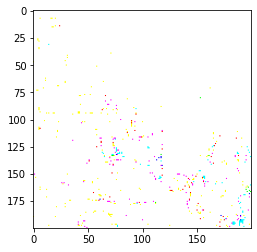

In [116]:
dir_path = '/content/drive/MyDrive/Spam_Image_Detection/BaseData/Testing/Spam/'

for i in os.listdir(dir_path):
#print(i)
        img = image.load_img(dir_path+''+ i,target_size=(200,200))
        plt.imshow(img)
        X = X.reshape(200, 200, 3)
        plt.imshow(X)

        X = image.img_to_array(img)
        X = np.expand_dims(X,axis=0)
        images = np.vstack([X])
        val = model.predict(images)

        if val == 0:
	          print("spam")
        else:
	          print("not spam")